In [85]:
from emoji import emoji_count
import numpy as np
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import seaborn as sns 

|Column|Description|
|:------:|:---:|
|gender|Gender (target column)|
|age|User's age range|
|fullname|Name written on the social network profile |
|username|Username|
|biography|User's social network biography|
|follower_count|Number of followers the user has|
|following_count|Number of people following the user|
|is_business|Business account|
|is_verified|Verified account|
|is_private|Private account|

In [131]:
data = pd.read_csv('data.csv')

In [3]:
data.shape

(8000, 10)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           8000 non-null   object 
 1   age              8000 non-null   int64  
 2   fullname         8000 non-null   object 
 3   username         8000 non-null   object 
 4   biography        8000 non-null   object 
 5   follower_count   8000 non-null   float64
 6   following_count  8000 non-null   float64
 7   is_business      7997 non-null   float64
 8   is_verified      8000 non-null   float64
 9   is_private       8000 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 625.1+ KB


## preprocessing

<Axes: xlabel='count', ylabel='gender'>

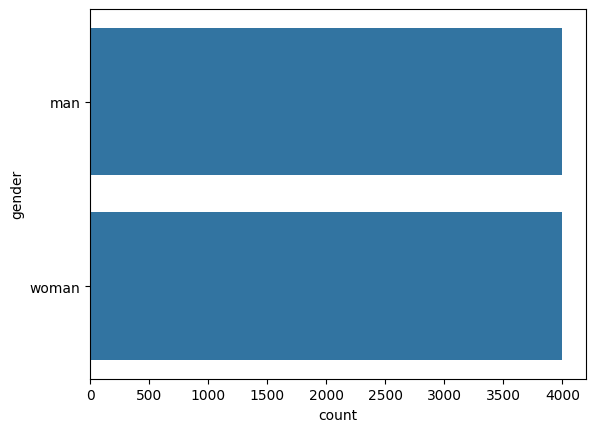

In [64]:
sns.countplot(data.gender)

In [65]:
data.isna().sum()

gender             0
age                0
fullname           0
username           0
biography          0
follower_count     0
following_count    0
is_business        3
is_verified        0
is_private         0
dtype: int64

In [137]:
data['fullname'] = data['fullname'].apply(str.lower)
data['biography'] = data['biography'].apply(str.lower)

In [136]:
data['emoji_count'] = data.biography.apply(emoji_count)
data.head()

,gender,age,fullname,username,biography,follower_count,following_count,is_business,is_verified,is_private,bio_lenght,emoji_count
0,man,2,Farshid,mr_gh_farshid,دردا ک در این بادیه بسیار دویدیم...\nGlory man...,7.380879,1407.0,0.0,0.0,0.0,14,3
1,woman,2,zahr@72,zahra.roozbahani72,"خواهی که زکوچ در امان برگردی\nباید که به جان ,...",4.219508,501.0,0.0,0.0,0.0,14,0
2,woman,2,ms farahnaz♥,___lady.farahnazi.__,"Having you, is all I wish for \nداشتنت، تمامِ...",0.000000,0.0,0.0,0.0,0.0,17,8
3,woman,1,Lena.mommy farzan,mommy.lena3361,دردونه من لنا کوچولو,0.000000,0.0,0.0,0.0,0.0,4,0
4,woman,2,Narsis Asadollahi,_l.aurora.l_,I am an animation student\n🎧🎼🎨⚓️🤍 \n@general.m...,5.303305,328.0,0.0,0.0,0.0,7,5


<Axes: xlabel='emoji_count', ylabel='Density'>

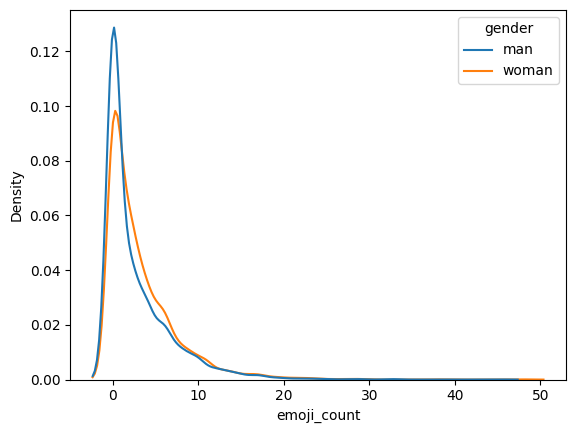

In [68]:
sns.kdeplot(data, x='emoji_count', hue='gender' )

<Axes: xlabel='bio_lenght', ylabel='Density'>

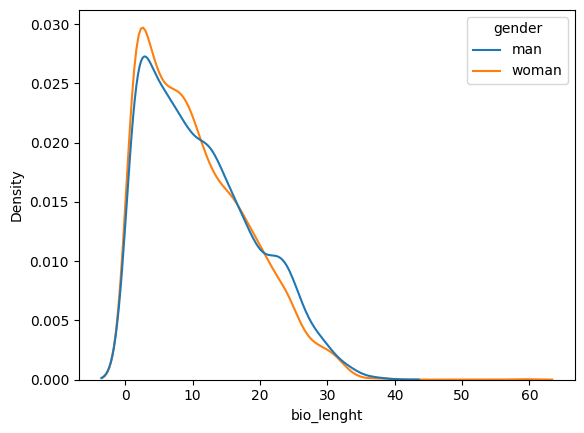

In [135]:
data['bio_lenght']= data.biography.apply(lambda s : len(s.split()))
sns.kdeplot(data, x='bio_lenght', hue='gender')

In [134]:
data.username = data.username.str.replace('(\d+)','')
data.fullname = data.fullname.str.replace('(\d+)','')

In [133]:
data['follower_count'] = data.follower_count.apply(lambda x : np.log(x+1))

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           8000 non-null   object 
 1   age              8000 non-null   int64  
 2   fullname         8000 non-null   object 
 3   username         8000 non-null   object 
 4   biography        8000 non-null   object 
 5   follower_count   8000 non-null   float64
 6   following_count  8000 non-null   float64
 7   is_business      7997 non-null   float64
 8   is_verified      8000 non-null   float64
 9   is_private       8000 non-null   float64
 10  bio_lenght       8000 non-null   int64  
 11  emoji_count      8000 non-null   int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 750.1+ KB


In [72]:
tfidf = TfidfVectorizer()
tfidf.fit(data.fullname + ' ' + data.username + ' ' + data.biography)

TfidfVectorizer()

In [104]:
train, test = train_test_split(data, stratify=data.gender, test_size=.2)
x_train, y_train = train.drop('gender', axis=1), train.gender.map({'man': 0, 'woman': 1})
x_test, y_test = test.drop('gender', axis=1), test.gender.map({'man': 0, 'woman': 1})

In [105]:
txt_model = XGBClassifier()

txt_model.fit(tfidf.transform(x_train.fullname + ' ' + x_train.username + ' ' + x_train.biography), y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [106]:
model = XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)

# Define the parameter distribution for random search
param_dist = {
    'n_estimators': randint(100, 500),  # Number of trees
    'max_depth': randint(7, 15),        # Maximum depth of a tree
    'learning_rate': uniform(0.01, 0.2),  # Learning rate
    'subsample': uniform(0.5, 0.5),     # Subsample ratio of the training instances
    'colsample_bytree': uniform(0.5, 0.5),  # Subsample ratio of columns when constructing each tree
    'gamma': uniform(0, 1),             # Minimum loss reduction required to make a split
    'reg_alpha': uniform(0, 1),         # L1 regularization term on weights
    'reg_lambda': uniform(0, 1)         # L2 regularization term on weights
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings to sample
    scoring='accuracy',  # Metric to evaluate
    cv=5,  # Number of cross-validation folds
    verbose=1,  # Verbosity level
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Perform the random search
random_search.fit(tfidf.transform(x_train.fullname + ' ' + x_train.username + ' ' + x_train.biography), y_train)

# Print the best parameters and best score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)

# Evaluate the best model on the test set
txt_model = random_search.best_estimator_
test_accuracy = txt_model.score(tfidf.transform(x_test.fullname + ' ' + x_test.username + ' ' + x_test.biography), y_test)
print("Test set accuracy with best model: ", test_accuracy)

e:\Courses&Code\ML_excersice\env\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
e:\Courses&Code\ML_excersice\env\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
e:\Courses&Code\ML_excersice\env\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'colsample_bytree': 0.9210115375059906, 'gamma': 0.19438003399487302, 'learning_rate': 0.09227078101133572, 'max_depth': 9, 'n_estimators': 410, 'reg_alpha': 0.13835309241780136, 'reg_lambda': 0.1327454222429698, 'subsample': 0.9847684335570794}
Best cross-validation score:  0.7696875000000001
Test set accuracy with best model:  0.781875


In [139]:
print(classification_report(y_test, \
                            txt_model.predict(tfidf.transform(x_test.fullname + ' ' + x_test.username + ' ' + x_test.biography))))

              precision    recall  f1-score   support

           0       0.84      0.70      0.76       800
           1       0.74      0.86      0.80       800

    accuracy                           0.78      1600
   macro avg       0.79      0.78      0.78      1600
weighted avg       0.79      0.78      0.78      1600



In [140]:
gender_by_txt_features =  txt_model.predict(tfidf.transform(data.fullname + ' ' + data.username + ' ' + data.biography))

In [144]:
df = data.loc[: ,['age', 'follower_count', 'is_business', 'is_verified', 'is_private', 'emoji_count', 'bio_lenght', 'gender']]
df.loc[:,'gender_by_txt'] = gender_by_txt_features
df.head()

,age,follower_count,is_business,is_verified,is_private,emoji_count,bio_lenght,gender,gender_by_txt
0,2,7.380879,0.0,0.0,0.0,3,14,man,0
1,2,4.219508,0.0,0.0,0.0,0,14,woman,1
2,2,0.000000,0.0,0.0,0.0,8,17,woman,1
3,1,0.000000,0.0,0.0,0.0,0,4,woman,1
4,2,5.303305,0.0,0.0,0.0,5,7,woman,1


In [145]:
df.loc[:, 'gender_by_txt'] = df['gender_by_txt'].replace({'woman':0, 'man':1})
df.head()

,age,follower_count,is_business,is_verified,is_private,emoji_count,bio_lenght,gender,gender_by_txt
0,2,7.380879,0.0,0.0,0.0,3,14,man,0
1,2,4.219508,0.0,0.0,0.0,0,14,woman,1
2,2,0.000000,0.0,0.0,0.0,8,17,woman,1
3,1,0.000000,0.0,0.0,0.0,0,4,woman,1
4,2,5.303305,0.0,0.0,0.0,5,7,woman,1


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             8000 non-null   int64  
 1   follower_count  8000 non-null   float64
 2   is_business     7997 non-null   float64
 3   is_verified     8000 non-null   float64
 4   is_private      8000 non-null   float64
 5   emoji_count     8000 non-null   int64  
 6   bio_lenght      8000 non-null   int64  
 7   gender          8000 non-null   object 
 8   gender_by_txt   8000 non-null   int32  
dtypes: float64(4), int32(1), int64(3), object(1)
memory usage: 531.4+ KB


In [148]:
df = df[df['is_business'].notnull()]

In [149]:
df.shape

(7997, 9)

In [152]:
train, test = train_test_split(df, stratify=df.gender, test_size=.2)
x_train, y_train = train.drop('gender', axis=1), train.gender.map({'man': 0, 'woman': 1})
x_test, y_test = test.drop('gender', axis=1), test.gender.map({'man': 0, 'woman': 1})

In [166]:
model = XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)

# Define the parameter distribution for random search
param_dist = {
    'n_estimators': randint(100, 500),  # Number of trees
    'max_depth': randint(7, 15),        # Maximum depth of a tree
    'learning_rate': uniform(0.01, 0.2),  # Learning rate
    'subsample': uniform(0.5, 0.5),     # Subsample ratio of the training instances
    'colsample_bytree': uniform(0.5, 0.5),  # Subsample ratio of columns when constructing each tree
    'gamma': uniform(0, 1),             # Minimum loss reduction required to make a split
    'reg_alpha': uniform(0, 1),         # L1 regularization term on weights
    'reg_lambda': uniform(0, 1)         # L2 regularization term on weights
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings to sample
    scoring='accuracy',  # Metric to evaluate
    cv=5,  # Number of cross-validation folds
    verbose=1,  # Verbosity level
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Perform the random search
random_search.fit(x_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)

# Evaluate the best model on the test set
final_model = random_search.best_estimator_
test_accuracy = final_model.score(x_test, y_test)
print("Test set accuracy with best model: ", test_accuracy)

e:\Courses&Code\ML_excersice\env\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
e:\Courses&Code\ML_excersice\env\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
e:\Courses&Code\ML_excersice\env\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'colsample_bytree': 0.6933676731502687, 'gamma': 0.9367299887367345, 'learning_rate': 0.037504188829198655, 'max_depth': 10, 'n_estimators': 250, 'reg_alpha': 0.5414479738275658, 'reg_lambda': 0.6957843993450822, 'subsample': 0.6142750108986499}
Best cross-validation score:  0.8819733434323691
Test set accuracy with best model:  0.888125


In [167]:
print(classification_report(y_test, final_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       800
           1       0.86      0.93      0.89       800

    accuracy                           0.89      1600
   macro avg       0.89      0.89      0.89      1600
weighted avg       0.89      0.89      0.89      1600



[[678 122]
 [ 57 743]]


<Axes: >

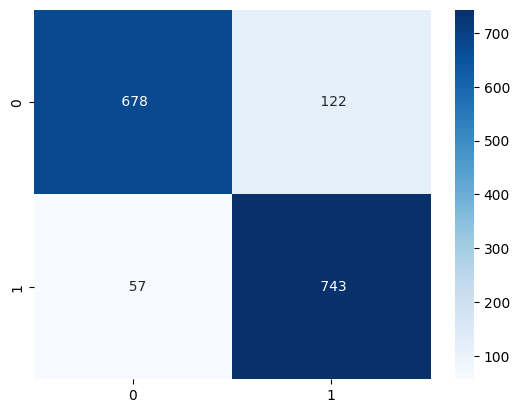

In [168]:
cf_matrix = confusion_matrix(y_test, final_model.predict(x_test))
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True,fmt='4', cmap='Blues')